# EXTRA4. Geometry

## Figuras planas  

<span style="color:orange"> Ejemplo:  
Dibujemos un círculo centrado en el (0,0) con radio 1.0</style>

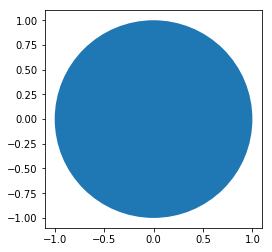

In [7]:
import matplotlib.pyplot as plt

# Vamos a separar la creación del círculo y el mostrar la figura en dos funciones
def crear_circulo():
    circulo = plt.Circle((0, 0), radius = 1.0)
    return circulo
# Con esta funcion creamos un circulo centrado en (0,0) con radio 1
# En definitiva lo que devuelve es el círculo creado

# Creamos ahora la función para mostrar la figura con un metodo genérico que nos valga en otros casos
def mostrar_figura(patch):
    # Para devolver los ejes actuales
    ax = plt.gca()
    # Le agregamos la figura que le pasamos usando la funcion mostrar_figura
    ax.add_patch(patch)
    # Llamamos a la función axis con el parámetro escalado, para indicarle a matplotlib que ajuste automática
    # los límites de los ejes
    plt.axis('scaled')
    # Mostramos la figura
    plt.show()
        
if __name__ == '__main__':
    c = crear_circulo()
    mostrar_figura(c)



<span style="color:orange"> Ejemplo:  
Dibujemos ahora una elipse de 0.1 de ancho y 0.4 de alto</style>

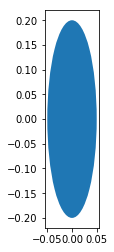

In [15]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Vamos a separar la creación del círculo y el mostrar la figura en dos funciones
def crear_elipse():
    elipse = Ellipse((0, 0), width=0.1, height=0.4)
    return elipse
# Con esta funcion creamos un circulo centrado en (0,0) con radio 1
# En definitiva lo que devuelve es el círculo creado

# Creamos ahora la función para mostrar la figura con un metodo genérico que nos valga en otros casos
def mostrar_figura(patch):
    # Para devolver los ejes actuales
    ax = plt.gca()
    # Le agregamos la figura que le pasamos usando la funcion mostrar_figura
    ax.add_patch(patch)
    # Llamamos a la función axis con el parámetro escalado, para indicarle a matplotlib que ajuste automática
    # los límites de los ejes
    plt.axis('scaled')
    # Mostramos la figura
    plt.show()
        
if __name__ == '__main__':
    c = crear_elipse()
    mostrar_figura(c)

<span style="color:orange"> Ejemplo:  
Dibujemos ahora una elipse de 0.1 de ancho y 0.4 de alto con un giro de 90º</style>

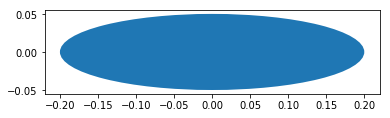

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Vamos a separar la creación del círculo y el mostrar la figura en dos funciones
def crear_elipse():
    elipse = Ellipse((0, 0), width=0.1, height=0.4, angle=90)
    return elipse
# Con esta funcion creamos un circulo centrado en (0,0) con radio 1
# En definitiva lo que devuelve es el círculo creado

# Creamos ahora la función para mostrar la figura con un metodo genérico que nos valga en otros casos
def mostrar_figura(patch):
    # Para devolver los ejes actuales
    ax = plt.gca()
    # Le agregamos la figura que le pasamos usando la funcion mostrar_figura
    ax.add_patch(patch)
    # Llamamos a la función axis con el parámetro escalado, para indicarle a matplotlib que ajuste automática
    # los límites de los ejes
    plt.axis('scaled')
    # Mostramos la figura
    plt.show()
        
if __name__ == '__main__':
    c = crear_elipse()
    mostrar_figura(c)

## Fractales

Romanescu...  

<img src="Images/1200px-Romanescu.jpg" style="width: 300px;"/>  

Los fractales son patrones geométricos complejos o formas que surgen de fórmulas matemáticas sorprendentemente simples.  

En comparación con las formas geométricas, como los círculos y los rectángulos, un fractal parece irregular y sin ningún patrón o descripción obvios, pero si observa detenidamente, veremos que los patrones emergen y la forma completa está compuesta de numerosas copias de sí misma.  

Debido a que los fractales implican la aplicación repetitiva de la misma transformación geométrica de puntos en un plano, los programas de computadora son adecuados para crearlos.  

Los fractales abundan en la naturaleza: los ejemplos populares incluyen árboles y copos de nieve.  

#### Transformaciones de puntos en el plano. 

Una idea básica en la creación de fractales es la de la transformación de un punto.  

Dado un punto, P (x, y), un ejemplo de una transformación es (x, y) $\rightarrow$ (x + 1, y + 1)  

Esta transformación es, por lo tanto, una regla que describe cómo se mueve un punto en el plano XY, comenzando desde una posición inicial y moviéndose a un punto diferente en cada iteración.  

Pensemos ahora que en lugar de una regla de transformación, hay dos reglas de este tipo y una de estas transformaciones se selecciona al azar en cada paso. Consideremos estas reglas:
* Regla 1: (x, y) $\rightarrow$ (x + 1, y - 1) 
* Regla 2: (x, y) $\rightarrow$ (x + 1, y + 1)  

Si tenemos el punto (1,1), podríamos tener, por ejemplo, la siguiente secuencia:  
* P1(1,1) $\rightarrow$ P2(2,0) (Regla 1)  
* P2(2,0) $\rightarrow$ P3(3,1) (Regla 2)  
* P3(3,1) $\rightarrow$ P4(4,2) (Regla 2)  
* P4(4,2) $\rightarrow$ P5(5,1) (Regla 1)
* etc.  

La regla de transformación se elige al azar, teniendo cada regla una probabilidad igual de ser seleccionado.  

No importa cuál se elija, los puntos avanzarán hacia la derecha porque aumentamos la coordenada x en ambos casos.  

A medida que los puntos van hacia la derecha, se mueven hacia arriba o hacia abajo, creando así una ruta en zigzag.  

<span style="color:orange"> Veamos ahora cómo hacerlo en Python</style>



Numero de iteraciones: 3


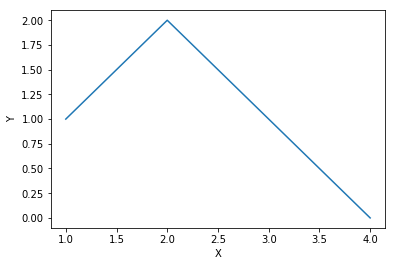

In [2]:
import matplotlib.pyplot as plt
import random

def regla1(p):
    x = p[0]
    y = p[1]
    return x + 1, y - 1

def regla2(p):
    x = p[0]
    y = p[1]
    return x + 1, y + 1

def transformacion(p):
    # Incluimos todas las reglas de transformacion
    lista_reglas = [regla1, regla2] 
    # elegimos aleatoriamente una funcion
    t = random.choice(lista_reglas)
    # Aplicamos la regla elegida
    x, y = t(p)
    # Devolvemos los nuevos valores
    return x, y

def trayectoria(p, n):
    x = [p[0]]
    y = [p[1]]
    for i in range(n):
        p = transformacion(p)
        x.append(p[0])
        y.append(p[1])
    return x, y

if __name__ == '__main__':
    # Punto inicial
    p = (1, 1)
    n = int(input('Numero de iteraciones: '))
    x, y = trayectoria(p, n)
    # Dibujo
    plt.plot(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

## El helecho de Barnsley (Barnsley Fern)  

El helecho Barnsley es un fractal que lleva el nombre del matemático británico Michael Barnsley, quien lo describió por primera vez en su libro Fractales en todas partes.   

<img src="Images/barnsley.jpg" style="width: 600px;"/>  

Usando aplicaciones repetidas de una transformación simple en un punto se pueden construir objetos de Barnsley.  

Propuso los siguientes pasos para crear estas estructuras:  
Comience con el punto (0, 0) y seleccionamos aleatoriamente una de las siguientes transformaciones con la probabilidad asignada:  
* Regla 1 (Probabilidad 0.85)  
    > x<sub>n+1</sub> = 0.85x<sub>n</sub> + 0.04y<sub>n</sub>  
    > y<sub>n+1</sub> = −0.04y<sub>n</sub> + 0.85y<sub>n</sub> + 1.6  
* Regla 2 (Probabilidad 0.07) 
    > x<sub>n+1</sub> =  0.2x<sub>n</sub> − 0.26y<sub>n</sub>  
    > y<sub>n+1</sub> = 0.23y<sub>n</sub> + 0.22y<sub>n</sub> + 1.6
* Regla 3 (Probabilidad 0.07) 
    > x<sub>n+1</sub> =  −0.15x<sub>n</sub> − 0.28y<sub>n</sub>  
    > y<sub>n+1</sub> = 0.26y<sub>n</sub> + 0.24y<sub>n</sub> + 0.44
* Regla 4 (Probabilidad 0.01) 
    > x<sub>n+1</sub> =  0    
    > y<sub>n+1</sub> = 0.16y<sub>n</sub>

<span style="color:orange"> Veamos ahora cómo hacerlo en Python</style>

In [1]:
import random
import matplotlib.pyplot as plt
def transformation_1(p):
    x = p[0]
    y = p[1]
    x1 = 0.85*x + 0.04*y
    y1 = -0.04*x + 0.85*y + 1.6
    return x1, y1

def transformation_2(p):
    x = p[0]
    y = p[1]
    x1 = 0.2*x - 0.26*y
    y1 = 0.23*x + 0.22*y + 1.6
    return x1, y1

def transformation_3(p):
    x = p[0]
    y = p[1]
    x1 = -0.15*x + 0.28*y
    y1 = 0.26*x  + 0.24*y + 0.44
    return x1, y1

def transformation_4(p):
    x = p[0]
    y = p[1]
    x1 = 0
    y1 = 0.16*y
    return x1, y1

def get_index(probability):
    r = random.random()
    c_probability = 0
    sum_probability = []
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    for item, sp in enumerate(sum_probability):
        if r <= sp:
            return item
    return len(probability)-1
def transform(p):
    # Lista de las transformaciones
    transformations = [transformation_1, transformation_2,transformation_3, transformation_4]
    probability = [0.85, 0.07, 0.07, 0.01]
    # Elegimos una transformación al azar y la llamamos
    tindex = get_index(probability)
    t = transformations[tindex]
    x, y = t(p)
    return x, y
def draw_fern(n):
    # Empezamos en (0, 0)
    x = [0]
    y = [0]
    x1, y1 = 0, 0
    for i in range(n):
        x1, y1 = transform((x1, y1))
        x.append(x1)
        y.append(y1)
    return x, y
if __name__ == '__main__':
    n = int(input('Introduce el número de puntos: '))
    x, y = draw_fern(n)
    # Graficamos
    plt.plot(x, y, 'o')
    plt.title('Helecho con {0} puntos'.format(n))
    plt.show()


Introduce el número de puntos: 5


<Figure size 640x480 with 1 Axes>